In [50]:
# I import all the libraries in the same place.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
# I import the excel file that I prepared in previous steps, all the code is within other files.

all_together = pd.read_excel('../data/all_together.xlsx')


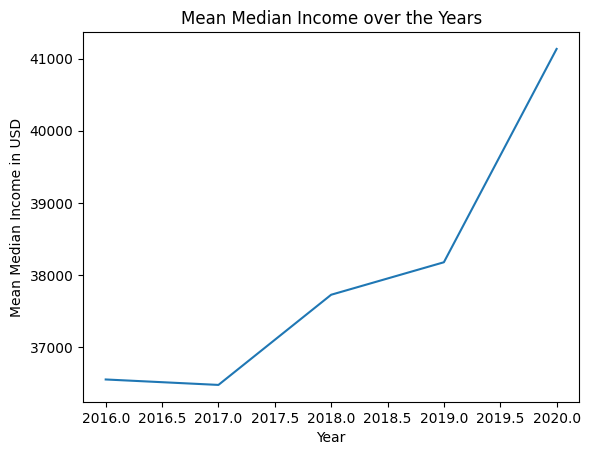

In [52]:


# Group the data by year and calculate the mean median income
mean_median_income_by_year = all_together.groupby('Year')['Median_income'].mean().reset_index()

# Plot the mean median income over the years
plt.plot(mean_median_income_by_year['Year'], mean_median_income_by_year['Median_income'])

# Add labels and title to the plot and save it
plt.xlabel('Year')
plt.ylabel('Mean Median Income in USD')
plt.title('Mean Median Income over the Years')
plt.savefig('../Plots/line_Income_Years.jpg')

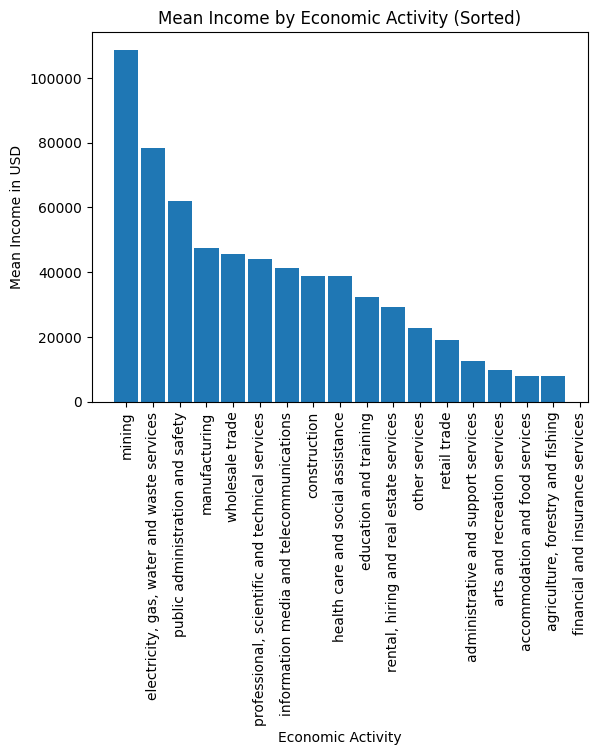

In [53]:
# Group the data by activity and calculate the mean number of sponsored visas
mean_sponsored_visas_by_activity = all_together.groupby('Activity')['Median_income'].mean().reset_index()

# Sort the data in descending order based on the mean number of sponsored visas
mean_sponsored_visas_by_activity = mean_sponsored_visas_by_activity.sort_values(by='Median_income', ascending=False)

# Plot the mean number of sponsored visas for each activity as a bar plot
plt.bar(mean_sponsored_visas_by_activity['Activity'], mean_sponsored_visas_by_activity['Median_income'],width=0.9)

# Add labels and title to the plot
plt.xlabel('Economic Activity')
plt.ylabel('Mean Income in USD')
plt.title('Mean Income by Economic Activity (Sorted)')


# Rotate the x-axis labels to improve readability
plt.xticks(rotation=90)

# Show the plot
plt.savefig('../Plots/bar_Income_activity.jpg')

The economic activities that have higher incomes are mining, natural resources, and public administration. Those are difficult to enter since you need to pass a lot of requirements. No good news for me in this matter. 

Now we will check the number of sponsored visas for year and activity.

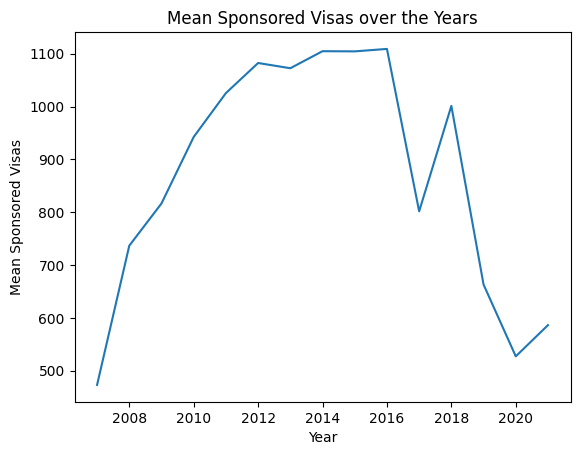

In [54]:

# Group the data by year and calculate the mean number of sponsored visas
mean_sponsored_visas_by_year = all_together.groupby('Year')['Sponsored_visas'].mean().reset_index()

# Plot the mean number of sponsored visas over the years
plt.plot(mean_sponsored_visas_by_year['Year'], mean_sponsored_visas_by_year['Sponsored_visas'])

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Mean Sponsored Visas')
plt.title('Mean Sponsored Visas over the Years')

# Show the plot
plt.savefig('../Plots/line_Visas_Years.jpg')


We can see how the number of sponsored visas was increasing from 2008 to 2016. That year, the AUS government decided to apply strictier policies to the process, that's why we see a huge drop that year. Later on, we can see that was increasing againg, even with the hard measures, and after that, it fell again due to fires around the country and Covid. Overall we can exctract, that the last 3-4 years, AUS didn't grant as many visas as before. It means that it is a good opportunity to request one, because as per natural growth, these numbers will increase and now they are quite low.

Let's see the which is the economic activity that grants more sponsored visas.

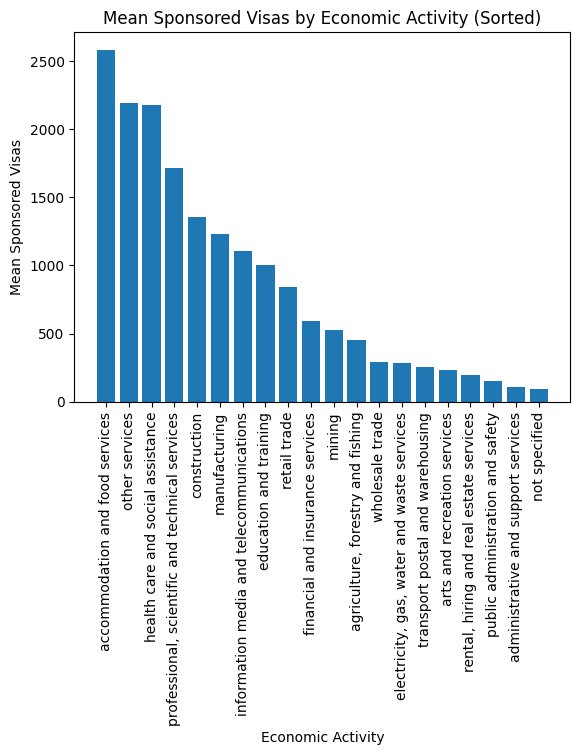

In [55]:


# Group the data by activity and calculate the mean number of sponsored visas
mean_sponsored_visas_by_activity = all_together.groupby('Activity')['Sponsored_visas'].mean().reset_index()

# Sort the data in descending order based on the mean number of sponsored visas
mean_sponsored_visas_by_activity = mean_sponsored_visas_by_activity.sort_values(by='Sponsored_visas', ascending=False)

# Plot the mean number of sponsored visas for each activity as a bar plot
plt.bar(mean_sponsored_visas_by_activity['Activity'], mean_sponsored_visas_by_activity['Sponsored_visas'],)


# Add labels and title to the plot
plt.xlabel('Economic Activity')
plt.ylabel('Mean Sponsored Visas')
plt.title('Mean Sponsored Visas by Economic Activity (Sorted)')

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=90)

# Show the plot
plt.savefig('../Plots/bar_Visas_activity.jpg')


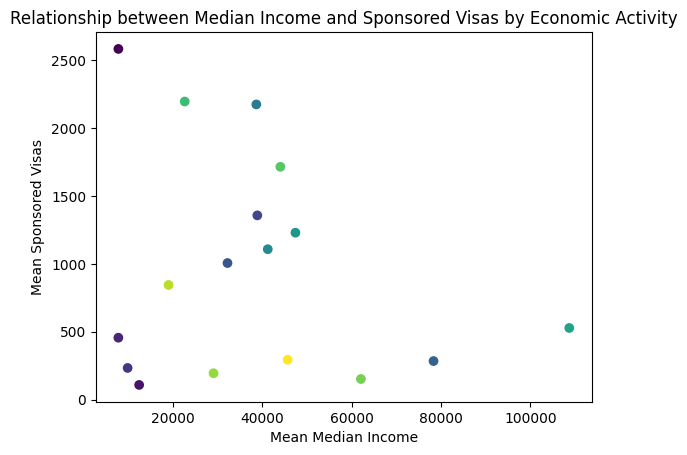

In [56]:



mean_median_income_and_sponsored_visas_by_activity = all_together.groupby('Activity').agg({'Median_income': 'mean', 'Sponsored_visas': 'mean'}).reset_index()

# Create a color map
cmap = plt.get_cmap('viridis')

# Plot the relationship between median income and number of sponsored visas as a scatter plot
plt.scatter(mean_median_income_and_sponsored_visas_by_activity['Median_income'], mean_median_income_and_sponsored_visas_by_activity['Sponsored_visas'], 
            c=mean_median_income_and_sponsored_visas_by_activity.index, cmap=cmap)

# Add labels and title to the plot
plt.xlabel('Mean Median Income')
plt.ylabel('Mean Sponsored Visas')
plt.title('Relationship between Median Income and Sponsored Visas by Economic Activity')

plt.savefig('../Plots/scatter_income_activity.jpg')


Text(0.5, 1.0, 'Distribution of Income')

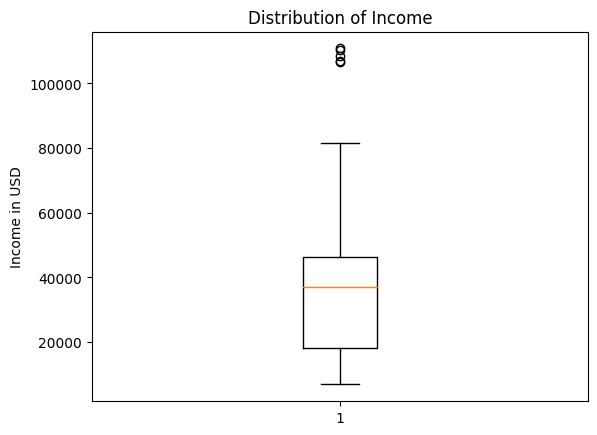

In [60]:
boxplot_df = all_together.dropna(subset=['Median_income'])
plt.boxplot(boxplot_df['Median_income'])
plt.savefig('../Plots/box_income.jpg')
plt.ylabel('Income in USD')
plt.title('Distribution of Income')

The range of incomes is really wide, from less than 10k up to 85k. And 50% of the people ar earning less than 40k, being the range between 20k and 40k the most common salary. That is not what I was expecting. The data didn't provide the working hours, that would be really useful too. 

Lastly, I wanted to try a fancy colorful plot, to see easly what is the activity with higher income and its the tendency.

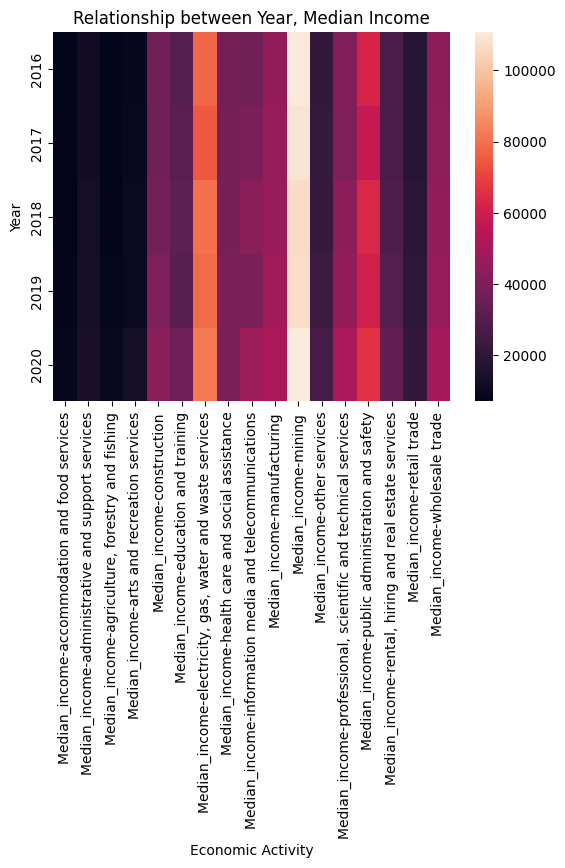

In [58]:


# Create a pivot table with year, median income, and number of sponsored visas as columns
pivot_table = all_together.pivot_table(index='Year', columns='Activity', values=['Median_income'])

# Plot the pivot table as a heatmap
sns.heatmap(pivot_table)

# Add labels and title to the plot
plt.xlabel('Economic Activity')
plt.ylabel('Year')
plt.title('Relationship between Year, Median Income')
plt.savefig('../Plots/heat_Income.jpg')

### We can conclude that is not easy to get a sponsored visa, and if you get any, is not going to be a high salary. But we will try it anyways!

PD: - All the code notebooks for each step are in the folder called "notebooks". 
    - All the python files that can be used are in the folder called "python_files".